# Challenge Data : classification linéaire des images de 2 et de 7

## Expérimentation en Python - Séance 1

On commence par importer les données dont nous aurons besoin :

In [1]:
# Importation des données 
from utilitaires_mnist_2 import *

## I. Rappel sur les images numériques en Python

Affichons une image `x` de taille $28 \times 28$ que nous avons importée, grâce à la fonction `affichage`

In [ ]:
# Dans cette cellule, afficher l'image x
affichage(x)

* Pour accèder à la valeur d'un pixel $(i,j)$ de $x$ :  `x[i,j]`.
* Afficher une valeur :  fonction `print()`

In [ ]:
# Dans cette cellule, afficher le pixel (14, 14) de l'image x


<br><br>

***
***

<br><br>

## II. Challenge : classer les chiffres 2 et 7

La base de données MNIST-2 contient des images de 2 et de 7 de taille $28 \times 28$. 

* `x_train` : liste d'images d'entraînement.
* `x_test` : liste d'images de test. 

* `y_train` : liste des classes $y \in \{-1, 1\}$ associés aux images de `x_train`.

**On a deux classes d'images :**
- la classe des chiffres $2$ : **classe -1**
- la classe des chiffres $7$ : **classe 1**

### II.1 Visualisation d'images d'entraînement 

* `x_train_par_population[0]` est une liste contenant toutes les images de 2.
* `x_train_par_population[1]` est une liste contenant toutes les images de 7.

In [ ]:
# Dans cette cellule, afficher la deuxième image au sein de la population de chiffres 6
affichage(x_train_par_population[1][1])

Exécutez la cellule ci-dessous afin d'afficher les dix premières images au sein de chaque population.

In [ ]:
# Affichage des dix premières images de 2
affichage_dix(x_train_par_population[0],[-1]*10)

# Affichage des dix premières images de 7
affichage_dix(x_train_par_population[1], [1]*10)

<br><br>

***
***

<br><br>

### II.2 Utiliser deux caractéristiques discriminantes au lieu d'une seule

**Benchmark :** Proposition de deux caractéristiques utilisées comme référence 

In [2]:
def deux_caracteristiques(x):
    # coupe horizontale
    k1 = moyenne(x[0:14,:])
    k2 = moyenne(x[14:,:])
    return (k1, k2)

### Visualisation dans le plan des caractéristiques des différentes populations

On calcule ces deux caractéristiques sur toutes les images de `x_train`, et on stocke les résultats dans une liste `c_train`. 

Exécutez la cellule suivante qui calcule la liste `c_train`.

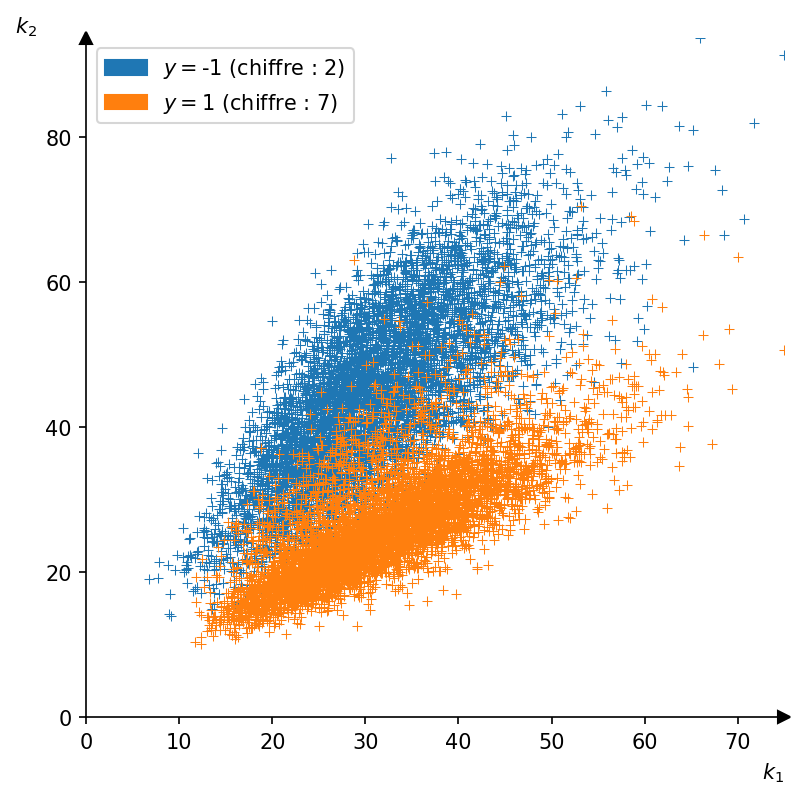

In [3]:
# On commence par définir et initialiser la liste c_train (vide au début)
c_train = []

# On la remplit à l'aide d'une boucle for :
for x in x_train:
    c_train.append(deux_caracteristiques(x))

visualiser_scatter_2d_mnist_2(c_train)

### II. 3. Classificateur linéaire

<b><font color=red> Proposer deux valeurs pour les paramètre $m$ et $p$ de l'équation de la droite.</font></b>

On rappelle que l'équation est $x_2 = m x_1 +p $

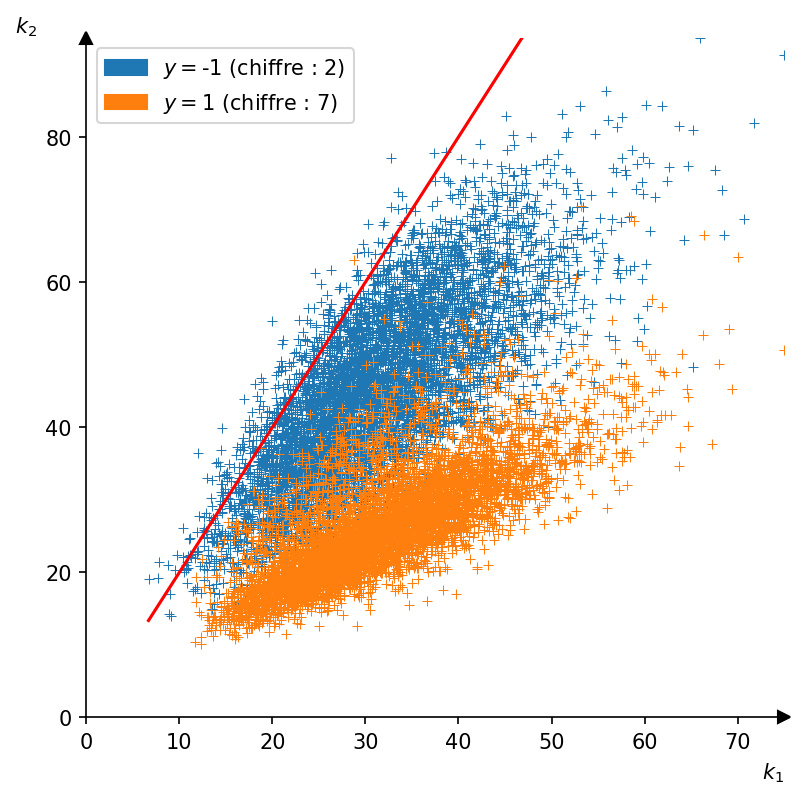

In [4]:
m = 2
p = 0

tracer_separatrice(m, p, c_train)

### Erreur sur l'ensemble d'entraînement

In [ ]:
def classificateur(m, p, k_1, k_2):
    s = np.sign(m*k_1 - k_2 +p)
    if s > 0:
        return 1
    else :
        return -1

In [ ]:
score = erreur_lineaire(m,p,c_train, y_train)
print("Score =", f"{100*score:.2f}%")

<b><font color=blue> Êtes-vous content de ce score ? Essayer de faire mieux en changeant les valeurs de $m$ et de $p$ pour avoir une erreur encore plus faible ! </b></font>

<b><font color=blue> Quand vous êtes satisfait de ce score, passez à la suite. </b></font>

<br><br>

***
***

<br><br>

### Erreur sur l'ensemble de test

On applique maintenant l'algorithme de classification précédent aux images de test `x_test`. On commence comme pour les images d'entraînement par calculer leurs caractéristiques et les stocker dans une liste `c_test`. 

<b><font color=red> Exécutez la cellule suivante :  </font></b> 

In [ ]:
# On commence par définir et initialiser la liste c_test (vide au début)
c_test = []

# On la remplit à l'aide d'une boucle for :
for x in x_test:
    c_test.append(deux_caracteristiques(x))
    
y_est_test = []

# On remplit y_est_test à l'aide de notre algorithme de classification :
for c in c_test:
    y_est_test.append(classificateur(m,p, c[0], c[1]))

# Sauve et télécharge les estimations `y_est_test` : 
sauver_et_telecharger_mnist_2(y_est_test, 'y_est_test.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/challenges/116)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?

### Guide pour la soumission
![Bouton soumissions](https://github.com/akimx98/challenge_data/blob/main/Guide%20site/soumettre.png?raw=true)
![Champs soumissions](https://github.com/akimx98/challenge_data/blob/main/Guide%20site/champs_soumission.png?raw=true)